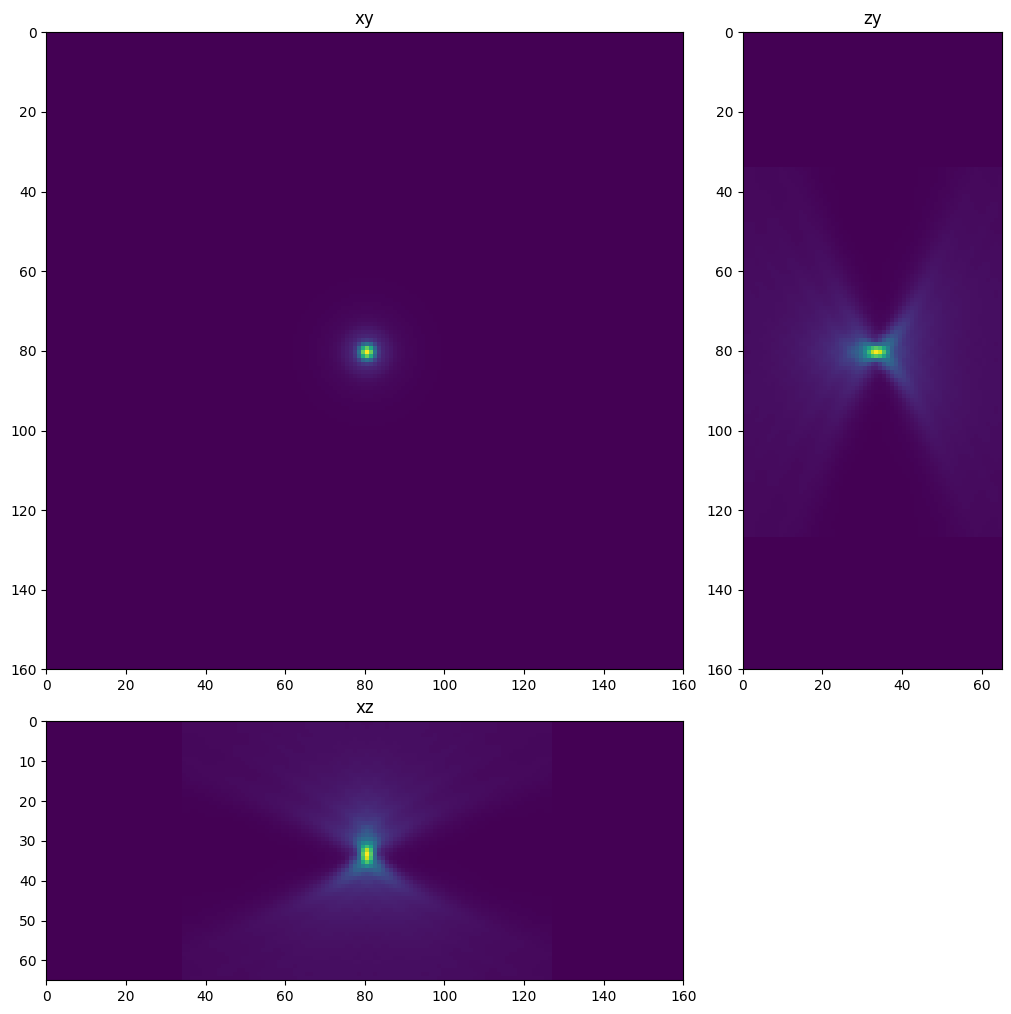

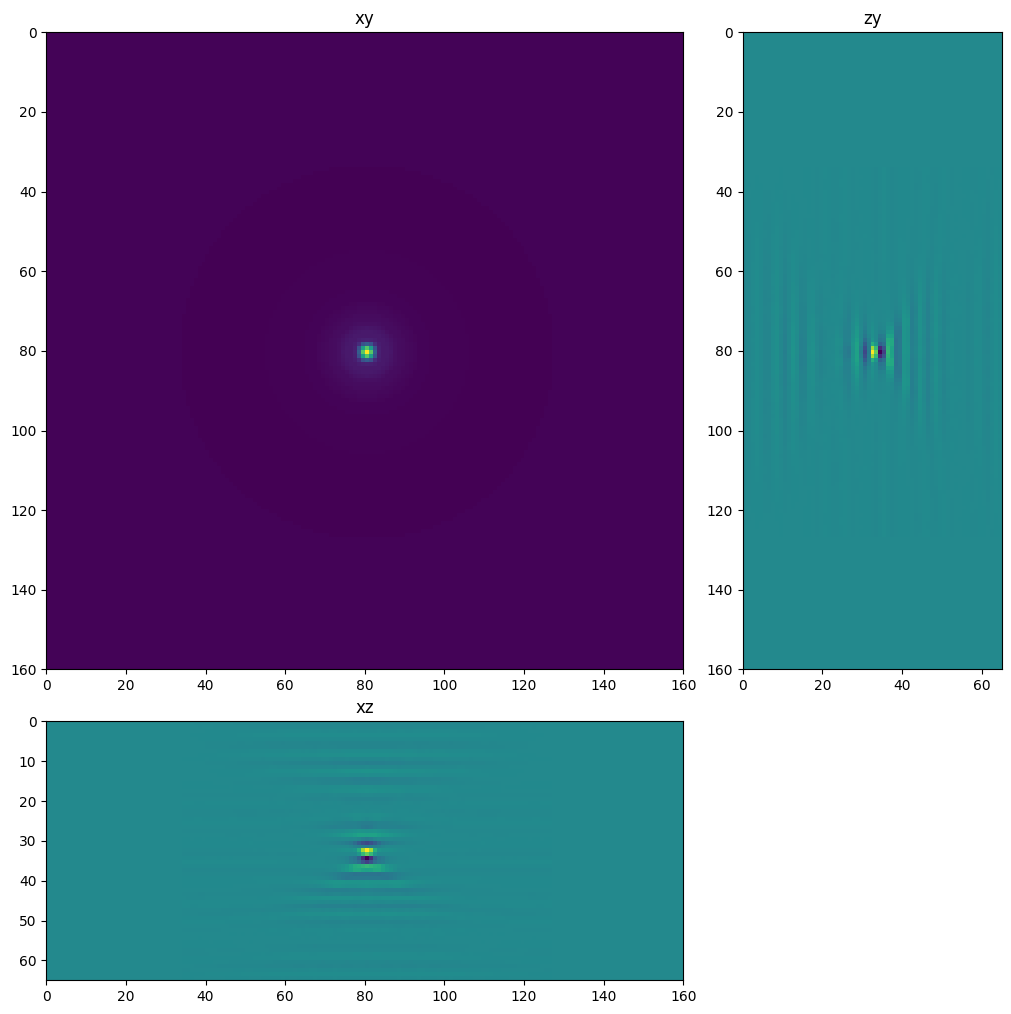

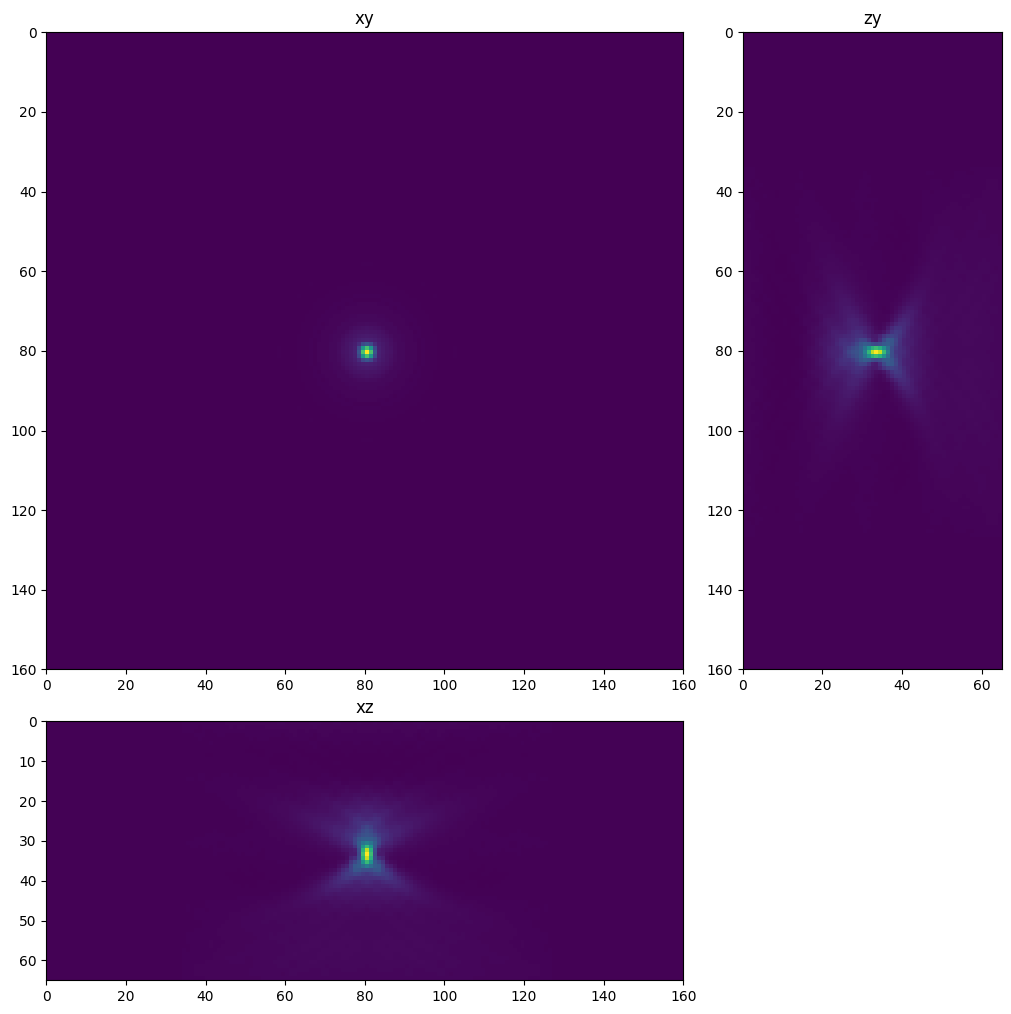

In [6]:
from skimage.io import imread
from tnia.plotting.projections import show_xyz_slice_center 

psf_path = r'C:\Users\bnort\work\Janelia\psfs\488nmLinOTF0'

psfs_3d = []

for n in range(3):
    psf_name = f'psf_3d_{n}.tif'
    psf = imread(f'{psf_path}\\{psf_name}')
    psfs_3d.append(psf)
    fig = show_xyz_slice_center(psf)


## Experiment with Wiener Filter

In [7]:
from skimage.restoration import wiener

result = wiener(psfs_3d[1], psfs_3d[1], 0.00001)
result.min(), result.max(), psfs_3d[1].min(), psfs_3d[1].max()

(-0.007057832, 0.021788694, -0.0002703038, 0.00030313607)

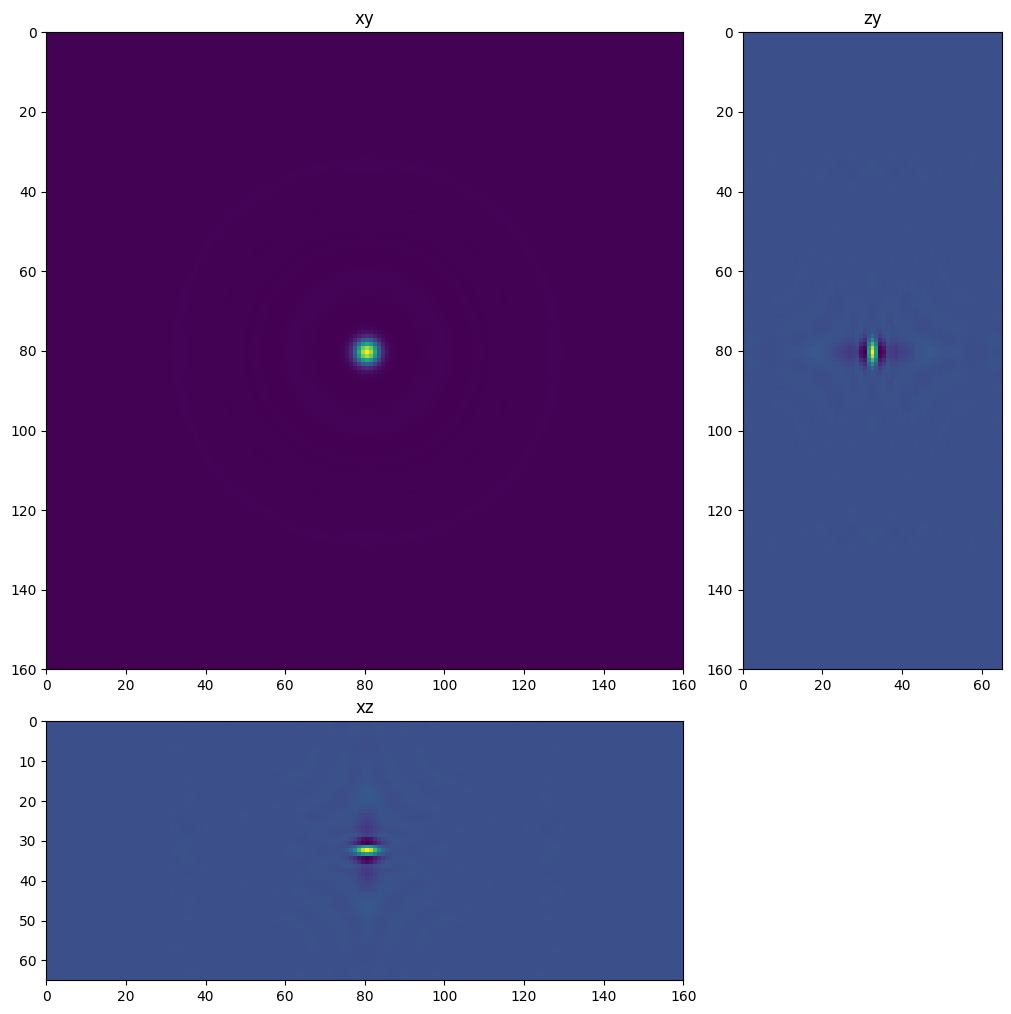

In [8]:
fig = show_xyz_slice_center(result)

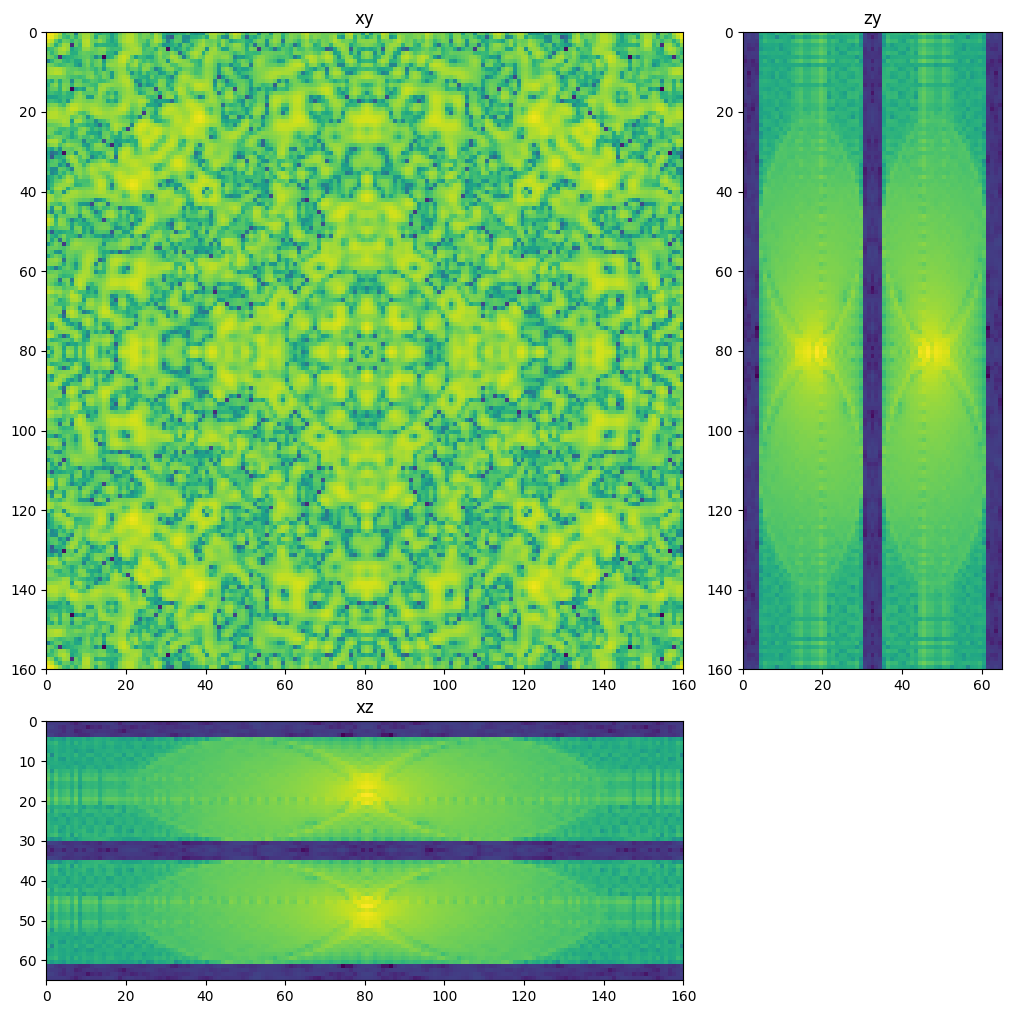

In [11]:
import numpy as np

def fftshift_abs_log(input):
    fft = np.fft.fftn(input)
    fft = np.fft.fftshift(fft)
    fft_abs = np.abs(fft)
    fft_abs = np.log(fft_abs)
    return fft_abs
fig = show_xyz_slice_center(fftshift_abs_log(psfs_3d[1]))

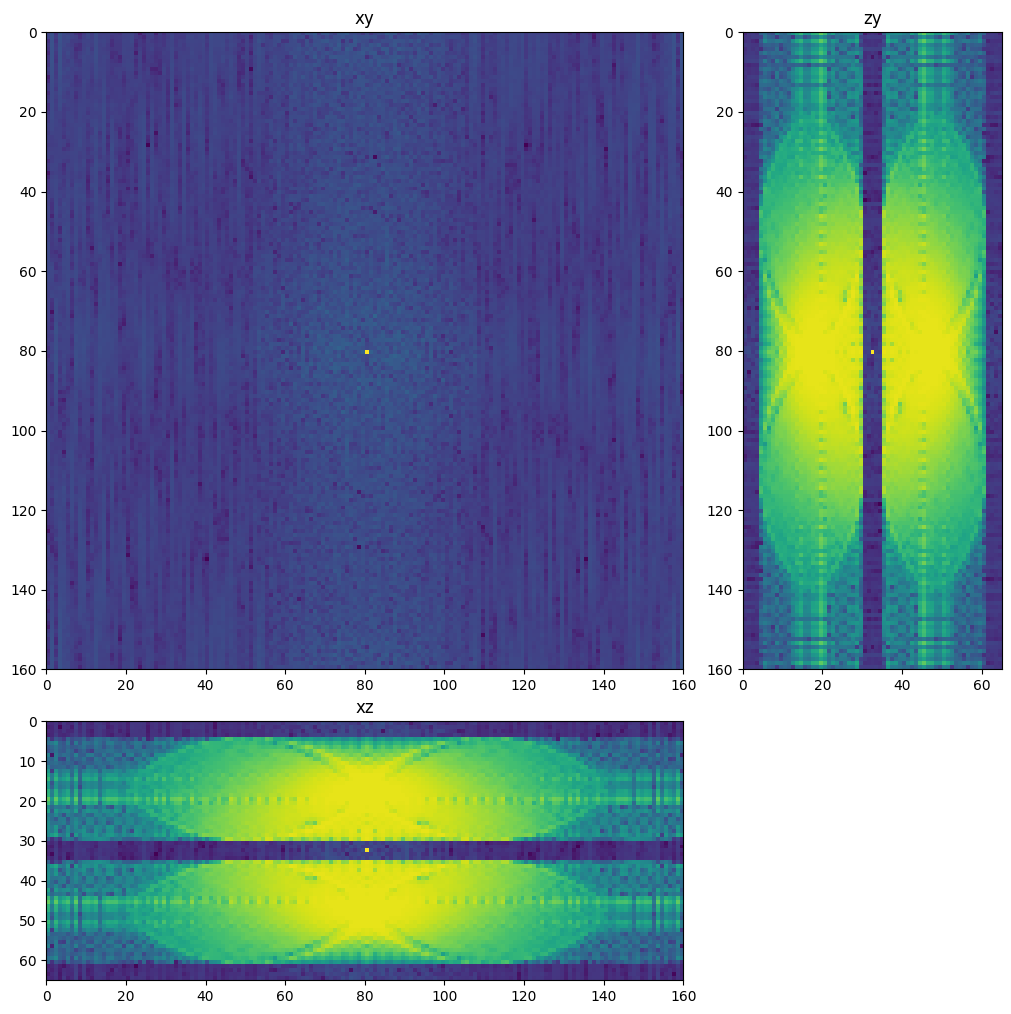

In [13]:
fig = show_xyz_slice_center(fftshift_abs_log(result))